In [4]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [5]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
import pandas as pd
import numpy as np
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [8]:
X = df
y = dataset['target']

In [9]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()

params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
    'splitter': ['best', 'random'],  
    'max_depth': [2, 3, 4, 5, 10, 15, 20, 25, 30],  
    'max_features': [None, 'sqrt', 'log2']
}


In [21]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=reg,param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)


d:\Python\CODE\venv\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20, 25, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = grid.predict(X_test)
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

49.420120264583645
0.2770138039725839


In [23]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 2,
 'max_features': None,
 'splitter': 'best'}

In [24]:
# Visualization
model = DecisionTreeRegressor(criterion='poisson',max_depth=2,max_features=None,splitter='best')
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.005\npoisson = 20.018\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.5, 'x[8] <= -0.003\npoisson = 14.627\nsamples = 209\nvalue = 118.043'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'poisson = 10.96\nsamples = 136\nvalue = 97.265'),
 Text(0.375, 0.16666666666666666, 'poisson = 12.084\nsamples = 73\nvalue = 156.753'),
 Text(0.75, 0.5, 'x[2] <= 0.073\npoisson = 13.413\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'poisson = 12.692\nsamples = 118\nvalue = 191.102'),
 Text(0.875, 0.16666666666666666, 'poisson = 4.843\nsamples = 26\nvalue = 271.077')]

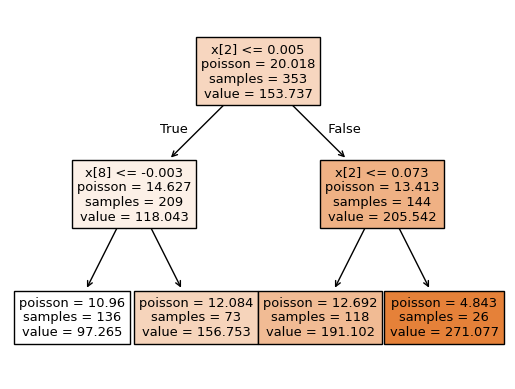

In [25]:
from sklearn import tree
tree.plot_tree(decision_tree=model,filled=True)